   # Student Exam Comparison


  
  
  The data set I will be working with is a fictional data set that was created by Royce Kimmons in 2012. The data was downloaded from kaggle and shows the student's exam grades in math, reading, and writing. Along with students grades, the data also shows the students race, lunch preference, parents level of education and gender. Due to the additional collection of side factors such as lunch preference and parents level of education we can dive into the data and see what factors are contributing factors when it comes to the student's success. there are three questions that we will keep in mind while examing the data.
  
  

In [3]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
student_performance = pd.read_csv('StudentsPerformance.csv')
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
student_performance['average grade'] = student_performance.mean(axis=1)
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


,math score,reading score,writing score,average grade
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


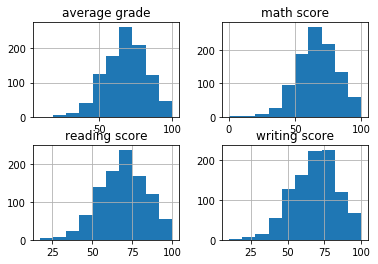

In [6]:
student_performance.hist()
student_performance.describe()

As we can see by looking at the data above the data set has a normal distribution with a slight negative skew for each. What this shows is that on the left side of the graph or the values below the mean value have values that are more spread out. You will also notice that I have added a new column to the data called "average grade". This average grade column is the sum of math, writing, and reading. This gives us the students overall average. This additional information will be useful later on in our analysis. We can also see that the average grade has a normal distribution with a slight negative skew. There are three questions that we will keep in mind while examing the data.
    
  1. Are grades in one subject a good indicator of their grade in another subject?
  2. How do uncontrollable factors affect the students performance?
  3. How do controllable factors affect the students performance?

### Are grades in one subject a good indicator of grades in the other subjects?


How will we determine whether or not a grade in one subject would infer the grade of another subject? For this, we will need to show a comparison of each student's grades in one subject in comparison to their grades in the other subjects. The best way to accomplish this would be to use scatter plots. We will need to plot data showing the comparison of math vs. reading, math vs. writing and then reading vs. writing. 

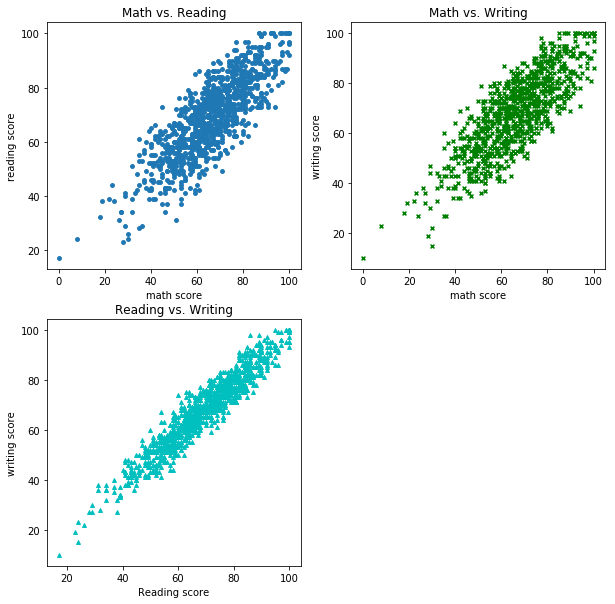

In [7]:
math_score = student_performance['math score'].values
reading_score = student_performance['reading score'].values
writing_score = student_performance['writing score'].values

plt.figure(figsize(10,10))

plt.subplot(2, 2, 1)
plt.scatter(math_score, reading_score,s=15, marker='o')
plt.title('Math vs. Reading')
plt.ylabel('reading score')
plt.xlabel('math score')


plt.subplot(2, 2, 2)
plt.scatter(math_score, writing_score,s=15, marker='x', c='g')
plt.title('Math vs. Writing')
plt.ylabel('writing score')
plt.xlabel('math score')

plt.subplot(2, 2, 3)
plt.scatter(reading_score, writing_score,s=15, marker='^', c='c')
plt.title('Reading vs. Writing')
plt.ylabel('writing score')
plt.xlabel('Reading score')
plt.show()

Let's take a look at the plots above. We can see that each plot is referencing one subjects grade on the x-axis and one subject on the y-axis. Each symbol in the graphs represents one student. As we can see in each of the graphs that the data trends upward. this would indicate that there is a definite correlation between the students grade in one subject and there grade in the other subjects. We can also see if we look at the comparison of reading and writing versus the other comparisons the trend line is tighter then the other comparisons. This tells us that the grade in Reading is a better indication of the student's grade in writing than that of the comparison of math and one of the other subjects.

### How do uncontrollable factors affect the student's success in the classroom?

We know that in life there are things that we can control and things that we can't control. What are the things that we can't control? In this case of the data, the things that are out of the control of the students are there gender, their parents level of education, and their race. there is nothing they can do to change these aspects of their lives and thus are out of there control. For our analysis we are analyzing the students as a whole, because of this, we will focus on the relation of the student's grades and their race and their parents level of education. In order to do this, we will use bar charts. The student's grades are a unique value as well. Before we can plot the data we to be able to convert the student's grades into letter grades. We will use the average grade column to accomplish this.

In [8]:
overall_letter_grade = []
for row in student_performance['average grade']:
    if row >= 90:
        overall_letter_grade.append('A')
    elif row >= 80:
        overall_letter_grade.append('B')
    elif row >= 70:
        overall_letter_grade.append('C')
    elif row >= 60:
        overall_letter_grade.append('D')
    else:
        overall_letter_grade.append('F')
        
student_performance['overall_letter_grade'] = overall_letter_grade
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average grade,overall_letter_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C


Text(0.5, 1.0, 'Level of Parental Education Comparison')

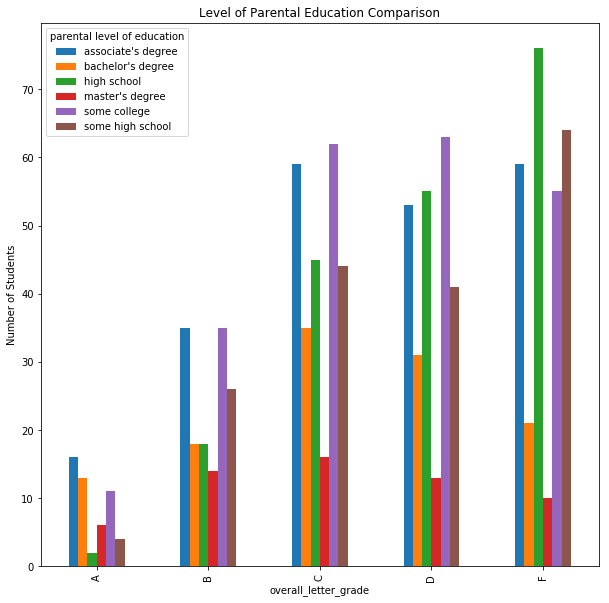

In [9]:
math_performance=student_performance.groupby(['overall_letter_grade','parental level of education']).size()
math_performance=math_performance.unstack()
math_performance.plot(kind='bar')
plt.ylabel('Number of Students')
plt.title('Level of Parental Education Comparison')

Looking at the data above we can see that the parental education level, for the most part, does not have an effect on the student's performance in the classroom. The only indication of an effect on student performance is for the students that received A's. If we look at the category labeled A, we can see that compared to the other categories have the lowest number of parents with some high school education level. Overall there is no significate relation between the parent's education level and the student's performance in the classroom.

Text(0.5, 1.0, 'Race Ethnicity Comparison')

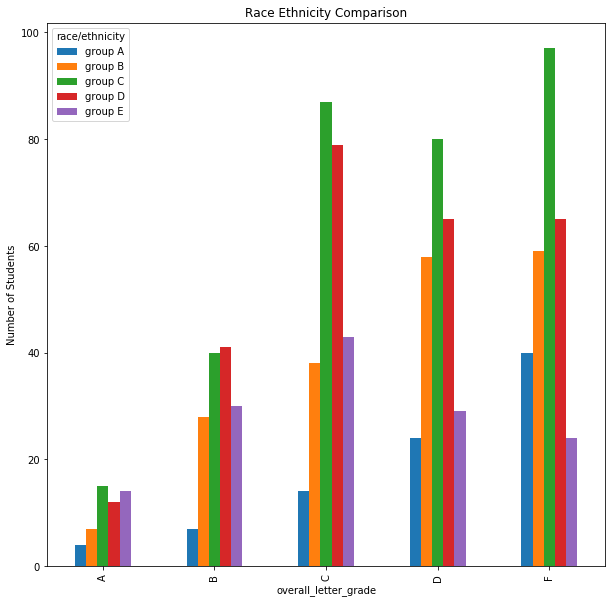

In [10]:
math_performance=student_performance.groupby(['overall_letter_grade','race/ethnicity']).size()
math_performance=math_performance.unstack()
math_performance.plot(kind='bar')
plt.ylabel('Number of Students')
plt.title('Race Ethnicity Comparison')

Just as we saw with the comparison of the student's parents education levels, there does not seem to be a significate relationship between the student's race and their performance in the classroom. When we look at the graph above we can see that the student performance is consistently distributed throught the race categories.

### How do controllable factors affect the students performance?

In [11]:
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average grade,overall_letter_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C


Now that we have looked at the factors that are out of the student's control. Now let us look at the things that are under the control of the students. These would be the student's lunch and the test preparation course. If we look at the data, we can see that the data is one or the other values. In the case of the student's lunch, they either ate a free or reduced lunch or standard lunch. If we look at the test preparation course column we can see that they either completed the course or the didn't. What we want to know is did these factors have any effect on the student's performance in on the exams.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114f77a90>,
      dtype=object)

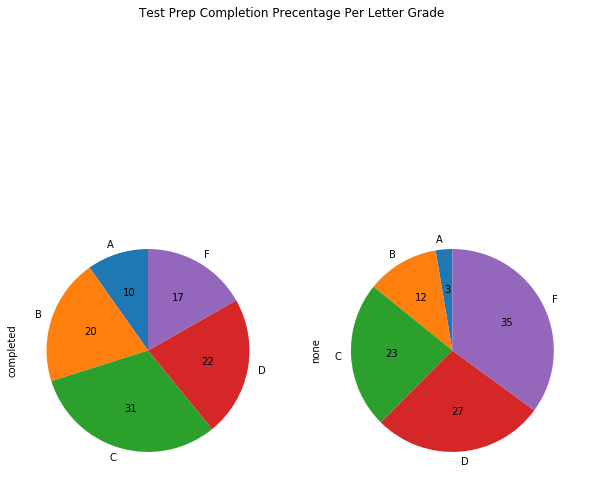

In [16]:
prep_precent = pd.crosstab(student_performance['overall_letter_grade'], student_performance['test preparation course'])
prep_precent.plot.pie(y=None,subplots=True, legend=None, autopct='%1.0f', 
                      title='Test Prep Completion Precentage Per Letter Grade', 
                         startangle =90)

If we look at the pie charts above, we can see that there is a distinct correlation between the student's performance and the completion of the test preparation course. We can't see that the number of F's are significantly higher for the population of students that didn't complete the test preparation course. We can also see by looking at the charts that the number of A's, B's, and C's are also higher in the group of students that did complete the test preparation course.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115ed59e8>,
      dtype=object)

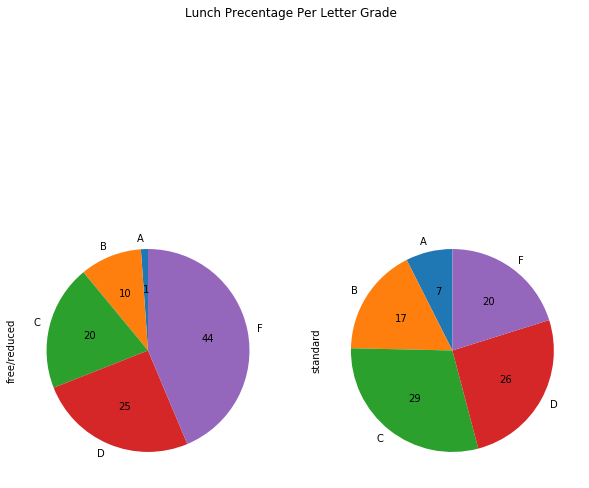

In [17]:
lunch_precent = pd.crosstab(student_performance['overall_letter_grade'], student_performance['lunch'])
lunch_precent.plot.pie(y=None,subplots=True, legend=None, autopct='%1.0f', 
                      title='Lunch Precentage Per Letter Grade', 
                         startangle =90)

As far as the correlation between the student's lunch and their performance in the classroom goes. If we look at the charts above we can see that there is once again a clear relationship. We can see that the students that ate the free/reduced lunch had an overwhelmingly higher number of F's than the students with the standard lunch.

### Conclusion

What have we learned about the data?

    
   1. We have learned that the students grade in one subject is a good indicator as to what their grades will be in the other subjects.
   2. We learned that factors that are not under the control of the students do not truly affect their outcome in the classroom.
   3. We learned that factors that are under the control of the students do play a factor in the success of the students in the classroom.
    
In conclusion, I propose that we dive deeper into the data to see if the same conclusions can be made for each race and gender individually. How I would go about doing this would be to first separate the data by race and see what conclusions can be made. Next, I would separate the data by gender to see if there are any differences in trends in the data. Lastly, I would separate the data by race and along with gender to once again see if the data shows any difference.